In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns  
from collections import Counter
import lightgbm as lgbm
import ast
from sklearn.preprocessing import MultiLabelBinarizer

warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000      
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1865,'revenue'] = 25000000      
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

In [4]:
train = train.set_index("id")
test = test.set_index("id")

In [5]:
data = train.append(test)

In [6]:
len(train), len(test), len(data)

(3000, 4398, 7398)

## helpers

In [9]:
def loss(predictions, targets):
    sum_ = np.sum(np.square(predictions - targets))
    return (sum_ / len(targets)) ** 0.5

def proc(x):
    try: r = ast.literal_eval(x)
    except: r =[]
    return r

def return_names(x):
        r = []
        for x_ in x:
            r.append(x_['name'])
        return r

def get_most_freq(n, ll):
    l = []
    for datum in ll:
        l.extend(datum)
    c = Counter(l)
    return [s[0] for s in c.most_common(n)]

def sum_freqs(ll):
    l = []
    for datum in ll:
        l.extend(datum)
    c = Counter(l)
    def sum_freqs_ll(x):
        return sum([c[i] for i in x])
    return sum_freqs_ll

## feature creation

In [10]:
def add_features(df):
    data = df.copy()
    # date features
    data[['release_month','release_day','release_year']]=data['release_date'].str.split(
        '/',expand=True).replace(np.nan, -1).astype(int)
    data.loc[ (data['release_year'] <= 19) & (data['release_year'] < 100), "release_year"] += 2000
    data.loc[ (data['release_year'] > 19)  & (data['release_year'] < 100), "release_year"] += 1900
    releaseDate = pd.to_datetime(data['release_date']) 
    data['release_dayofweek'] = releaseDate.dt.dayofweek
    
    # binar features
    data['has_homepage'] = 1
    data.loc[pd.isnull(data['homepage']) ,"has_homepage"] = 0
    data['isTaglineNA'] = 0
    data.loc[pd.isnull(data['tagline']) ,"isTaglineNA"] = 1
    data['isOriginalLanguageEng'] = 0 
    data.loc[ data['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
    
    # some devisions
    data['popularity_mean_year'] = data['popularity'] / data.groupby("release_year")["popularity"].transform('mean')
    data['releaseYear_popularity_ratio'] = data['release_year']/data['popularity']
    data['releaseYear_popularity_ratio2'] = data['popularity']/data['release_year']
    
    # strange counts
    data['production_countries_count'] = data['production_countries'].apply(proc).apply(lambda x : len(x))
    data['production_companies_count'] = data['production_companies'].apply(proc).apply(lambda x : len(x))
    data['cast_count'] = data['cast'].apply(proc).apply(lambda x : len(x))
    data['crew_count'] = data['crew'].apply(proc).apply(lambda x : len(x))
    data['genres_count'] = data['genres'].apply(proc).apply(lambda x : len(x))
    
    # strange sum counts
    crew = data.crew.apply(proc).apply(return_names)
    data["crew_sum_count"] = crew.apply(sum_freqs(crew.values))
    genre = data.genres.apply(proc).apply(return_names)
    data["genres_sum_count"] = genre.apply(sum_freqs(genre.values))
    country = data.production_countries.apply(proc).apply(return_names)
    data["country_sum_count"] = country.apply(sum_freqs(country.values))
    companies = data.production_companies.apply(proc).apply(return_names)
    data["companies_sum_count"] = companies.apply(sum_freqs(companies.values))
    cast = data.cast.apply(proc).apply(return_names)
    data["cast_sum_count"] = cast.apply(sum_freqs(cast.values))
    Keywords = data.Keywords.apply(proc).apply(return_names)
    data["Keywords_sum_count"] = Keywords.apply(sum_freqs(Keywords.values))
    
    features = ["release_month", "release_year", "release_dayofweek", "has_homepage", "isTaglineNA",
                "isOriginalLanguageEng", "popularity_mean_year", "releaseYear_popularity_ratio",
                "releaseYear_popularity_ratio2", "popularity", "production_companies_count",
                "production_countries_count", "cast_count", "crew_count", "genres_count", "crew_sum_count",
                "genres_sum_count", "country_sum_count", "companies_sum_count", "cast_sum_count",
                "Keywords_sum_count"]
    
    # one hot encode
    mlb = MultiLabelBinarizer(get_most_freq(4, data.genres.apply(proc).apply(return_names).values))
    X = mlb.fit_transform(data.genres.apply(proc).apply(return_names))
    data = data.join(pd.DataFrame(X, columns=mlb.classes_))
    features.extend(list(mlb.classes_))
    
    return features, data

In [11]:
def add_budget_features(df, features):
    data = df.copy()
    data['inflationBudget'] = np.log(data['budget'] + data['budget']*1.8/100*(2018-data['release_year']) + 1)
    data["log_budget"]  = np.log(data['budget']+1)
    data['budget_runtime_ratio'] = data['budget']/data['runtime'] 
    data['budget_popularity_ratio'] = data['budget']/data['popularity']
    data['budget_year_ratio'] = data['budget']/(data['release_year'])
    features.extend(["log_budget", "budget_runtime_ratio", "budget_popularity_ratio",
                     "budget_year_ratio", "inflationBudget"])
    return features, data

## make features and slice into train and validation

In [12]:
features, data = add_features(data)

In [13]:
data[features].head()

,release_month,release_year,release_dayofweek,has_homepage,isTaglineNA,isOriginalLanguageEng,popularity_mean_year,releaseYear_popularity_ratio,releaseYear_popularity_ratio2,popularity,...,crew_sum_count,genres_sum_count,country_sum_count,companies_sum_count,cast_sum_count,Keywords_sum_count,Drama,Comedy,Thriller,Action
id,,,,,,,,,,,,,,,,,,,,,
1,2,2015,4.0,0,0,1,0.577030,306.445562,0.003263,6.575393,...,312,2605,5617,705,236,569,1.0,1.0,0.0,0.0
2,8,2004,4.0,0,0,1,0.964887,242.941630,0.004116,8.248895,...,124,8391,5617,147,200,106,1.0,0.0,0.0,0.0
3,10,2014,4.0,1,0,1,5.257813,31.321933,0.031927,64.299990,...,417,3676,5617,45,189,435,1.0,0.0,1.0,0.0
4,3,2012,4.0,1,1,0,0.402309,633.713561,0.001578,3.174936,...,9,5545,220,0,28,111,0.0,0.0,1.0,1.0
5,2,2009,3.0,0,1,0,0.138906,1749.893299,0.000571,1.148070,...,4,3604,58,0,9,0,0.0,0.0,0.0,0.0


In [14]:
train = data[:3000]
test = data[3000:]

In [15]:
train_main = train[:2000]
val = train[2000:]

In [16]:
len(train_main), len(val)

(2000, 1000)

## train no budget

In [17]:
model = lgbm.LGBMRegressor(num_leaves=30, n_estimators=50, max_depth=5, learning_rate=0.1)
model.fit(train_main[features], np.log(train_main.revenue.values))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=5,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=50, n_jobs=-1, num_leaves=30, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [18]:
predicted = model.predict(train_main[features])

In [19]:
loss(predicted, np.log(train_main.revenue.values))

1.7258364464664824

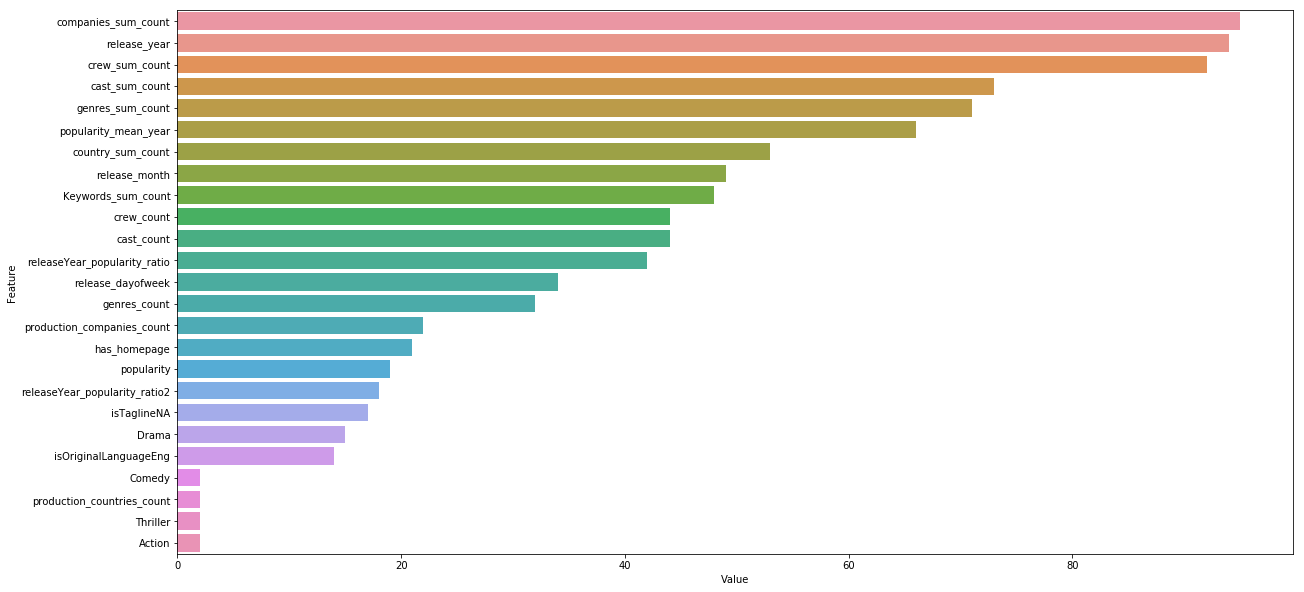

In [20]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, features)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False));

In [21]:
loss(model.predict(val[features]), np.log(val.revenue))

2.185863413496643

## no budget prediction

In [22]:
model = lgbm.LGBMRegressor(num_leaves=30, n_estimators=50, max_depth=5, learning_rate=0.1)
model.fit(train[features], np.log(train.revenue.values))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=5,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=50, n_jobs=-1, num_leaves=30, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [23]:
no_budget_prediction = pd.Series(model.predict(test[test.budget == 0][features]), index=test[test.budget == 0].revenue.index)

## budget prediction

In [24]:
features, data = add_budget_features(data, features)

In [25]:
train = data[:3000]
test = data[3000:]

train = train[train.budget != 0]
train_main = train[:1300]
val = train[1300:]

In [26]:
len(train_main), len(val)

(1300, 904)

In [29]:
model = lgbm.LGBMRegressor(num_leaves=15, n_estimators=100, max_depth=5, learning_rate=0.1)
model.fit(train_main[features], np.log(train_main.revenue.values))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=5,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=15, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [30]:
predicted = model.predict(train_main[features])
loss(predicted, np.log(train_main.revenue.values))

1.0354097997164833

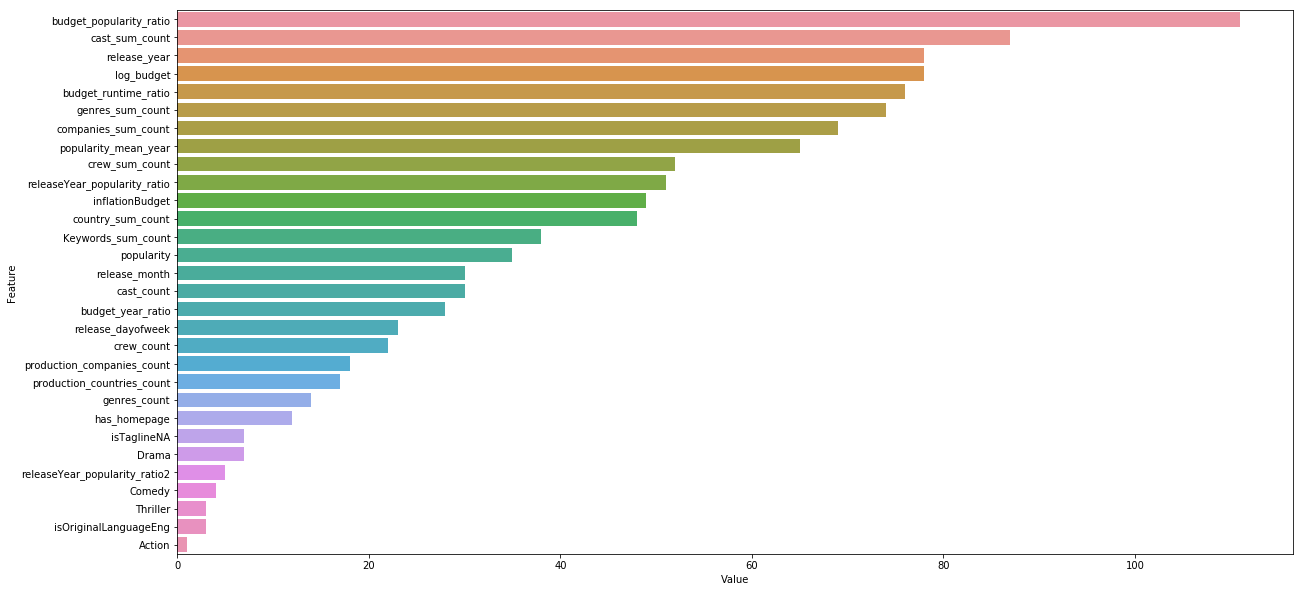

In [31]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, features)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False));

In [32]:
loss(model.predict(val[features]), np.log(val.revenue))

1.4916367681073508

## predict with budget

In [33]:
model = lgbm.LGBMRegressor(num_leaves=15, n_estimators=100, max_depth=5, learning_rate=0.1)
model.fit(train[train.budget != 0][features], np.log(train[train.budget != 0].revenue.values))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=5,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=15, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [34]:
budget_prediction = pd.Series(model.predict(test[test.budget != 0][features]),
                              index=test[test.budget != 0].revenue.index)

## combining

In [35]:
len(no_budget_prediction) + len(budget_prediction), len(test)

(4398, 4398)

In [36]:
sub = pd.read_csv("./sample_submission.csv")
sub = sub.set_index("id")

In [37]:
sub.revenue.update(no_budget_prediction)
sub.revenue.update(budget_prediction)

In [38]:
sub.revenue = np.exp(sub.revenue)

In [39]:
sub.to_csv("sub")